#**Anime Rating Analysis & Recommender System**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pprint import pprint
from tabulate import tabulate
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#**Business Understanding**
##**Tujuan Bisnis**
Tujuan proyek ini adalah untuk menganalisis data rating anime dan mengembangkan sistem rekomendasi untuk memberikan rekomendasi yang baik untuk pengguna berdasarkan kesukaan mereka. Dengan demikian, diharapkan dapat meningkatkan pengalaman pengguna dalam menemukan anime yang sesuai dengan selera mereka.


##**Assess Situation**
Situasi bisnis yang mendasari proyek ini adalah:

1. Kebutuhan akan sistem yang dapat membantu memberikan rekomendasi yang sesuai dengan selera mereka
2. Meningkatkan interaksi pengguna dengan platform anime.
3. Kurangnya pemahaman selera unik setiap pengguna, maka terdapat keaadan yang dimana rekomendasinya kurang tepat


##**Data Mining Goals**
Tujuan dari analisis data pada dataset ini adalah :


1. Mengembangkan sistem rekomendasi yang dapat memberikan rekomendasi anime yang sesuai dengan selera pengguna.
2.   Memprediksi rating anime berdasarkan faktor-faktor tertentu
3. mengidentifikasi tren dan pola dalam data rating


##**Projek Plan**
Pertama-tama dimulai dengan pengumpulan data rating anime dari sumber yang tersedia. Selanjutnya, data akan dijelaskan karakteristiknya dan pola-pola yang menarik untuk di itentifikasi. kemudian mendeskripsikan data yang akan di identifikasi seperti contoh "ID anime, nama, genre, jenis, episode, rating", lalu menilai kualitas data dan masalah data yang akan diidentifikasi.

#**Data Understanding**

##**Collect Initial Data**

In [ ]:
Data_URL = 'https://raw.githubusercontent.com/selaputriismalia/Data_Mining/main/anime.csv'

In [ ]:
data = pd.read_csv(Data_URL, on_bad_lines='skip')

In [ ]:
data = pd.read_csv("anime.csv")

In [ ]:
data2 = pd.read_csv("Data Cleaned.csv")

In [ ]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


##**Describe Data**

###Informasi Dasar

In [ ]:
print("Baris :",data.shape[0])
print("Kolom :",data.shape[1])

Baris : 12294
Kolom : 7


Pada Dataset yang tersedia total Baris adalah 12294 dengan total kolom 7

###informasi Lanjut

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


pada index 0 terdapat kolom "anime_id" Kolom ini berisi ID unik untuk setiap anime dalam dataset. Jumlahnya 12294 dan memiliki tipe data int64.

pada index 1 terdapat kolom "nama" Kolom ini berisi nama anime. Setiap entri adalah string (objek) dan tidak ada nilai yang hilang (non-null) di kolom ini.

pada index 2 terdapat kolom "genre" Kolom ini berisi genre-genre dari setiap anime. Ada 12232 entri non-null dalam kolom ini. Tipe data kolom ini adalah objek (string).

pada index 3 terdapat kolom "type" Kolom ini mewakili jenis dari anime, seperti TV, OVA, Movie, dll. Ada 12269 entri non-null dalam kolom ini. Tipe datanya adalah objek (string).

pada index 4 terdapat kolom "episodes" Kolom ini berisi informasi tentang jumlah episode dari setiap anime. Semua entri adalah string. Jumlah total entri sesuai dengan jumlah baris dalam dataset (12294).

pada index 5 terdapat kolom "rating" Kolom ini berisi rating dari setiap anime. Ada 12064 entri non-null dalam kolom ini. Tipe data kolom ini adalah float64.

pada index 6 terdapat kolom "members" Kolom ini berisi jumlah anggota yang telah memberikan peringkat terhadap anime tersebut. Semua entri adalah bilangan bulat (int64)

Jadi, dataset ini berisi informasi tentang anime, termasuk ID, nama, genre, jenis, jumlah episode, rating, dan jumlah anggota yang memberikan peringkat. Beberapa kolom memiliki (missing values), seperti genre, type, dan rating

###Informasi Statistik Deskriptif

In [ ]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


pada kolom output "index" diatas merupakan perhitungan yang meliputi, count,mean,sdt,min,25%,50%,75%, dan Max

pada kolom output "anime_id" Kolom ini berisi ID unik untuk setiap anime dalam dataset. Jumlah entri dalam kolom ini adalah 12294.0, Rata-rata entri dalam kolom ini adalah 14058.221652838783,Nilai minimumnya adalah 1.0 dan nilai maksimumnya adalah 34527.0  Standar deviasi dari kolom ini adalah 11455.29, menunjukkan sebaran yang cukup besar dari nilai-nilai anime_id. Nilai-nilai ini juga menunjukkan bahwa data anime_id tidak diurutkan secara berurutan.

rating: Kolom ini berisi rating untuk setiap anime. Jumlah entri yang tidak null dalam kolom ini adalah 12064. Nilai rata-ratanya adalah 6.47 dengan standar deviasi sekitar 1.03, menunjukkan variasi yang cukup rendah di antara nilai-nilai rating. Rating terendah adalah 1.67 dan rating tertinggi adalah 10.0.

members: Kolom ini berisi jumlah anggota yang memberikan peringkat terhadap anime tersebut. Jumlah entri dalam kolom ini adalah 12294. Jumlah anggota terendah yang memberikan peringkat adalah 5 dan jumlah anggota tertinggi yang memberikan peringkat adalah 1013917. Standar deviasi dari kolom ini adalah 54820.68, menunjukkan sebaran yang cukup besar dari jumlah anggota yang memberikan peringkat.

##**Exploratoory Data Analysis**

###Distribusi Variabel Tunggal

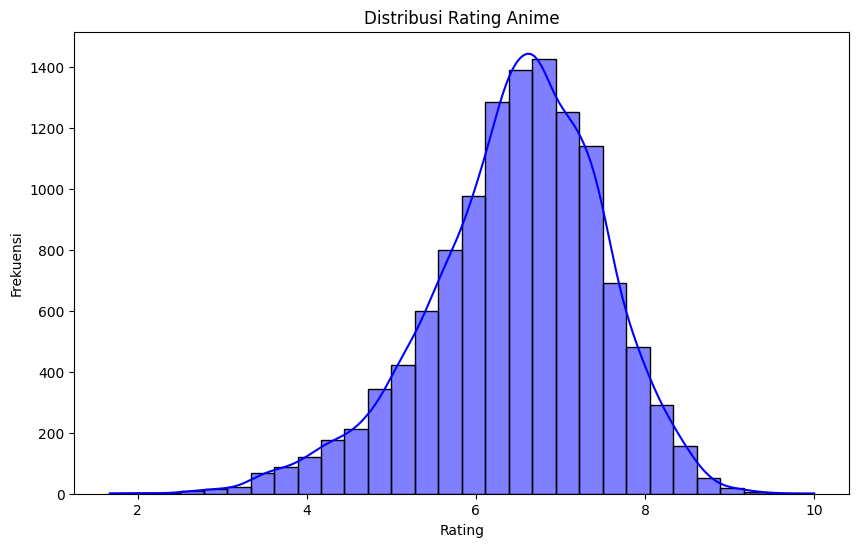

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=30, kde=True, color='blue')
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

####Histogram Distribusi Rating Anime:


Penjelasan: Histogram menunjukkan distribusi rating anime dalam dataset. yang dimana frekuensi dimulai dari 0-1400 dan rating dimulai dari 0-10


####**Interpretasi:**

*   Distribusi rating anime pada dataset ini tidak normal, dengan kemiringan ke kiri yang menunjukkan bahwa mayoritas anime memiliki rating yang lebih rendah.
*   Puncak distribusi berada di sekitar rating 6-7, menunjukkan bahwa banyak anime yang memiliki kualitas rata-rata.
* Ada beberapa anime yang memiliki rating sangat tinggi (9-10) dan juga sangat rendah (1-2).

*   Distribusi rating anime pada dataset ini menunjukkan bahwa Penonton anime memiliki selera yang beragam, dengan preferensi yang berbeda terhadap genre, gaya animasi, dan cerita.
* ada banyak anime yang memiliki kualitas yang kurang baik bagi beberapa preferensi tertentu
*   Ada banyak juga anime yang memiliki kualitas yang baik dan menarik bagi berbagai kalangan
* Rating anime tidak selalu mencerminkan kualitasnya, sehingga penting untuk melihat faktor lain seperti genre, cerita, dan karakter








###Hubungan Antar Dua Variabel

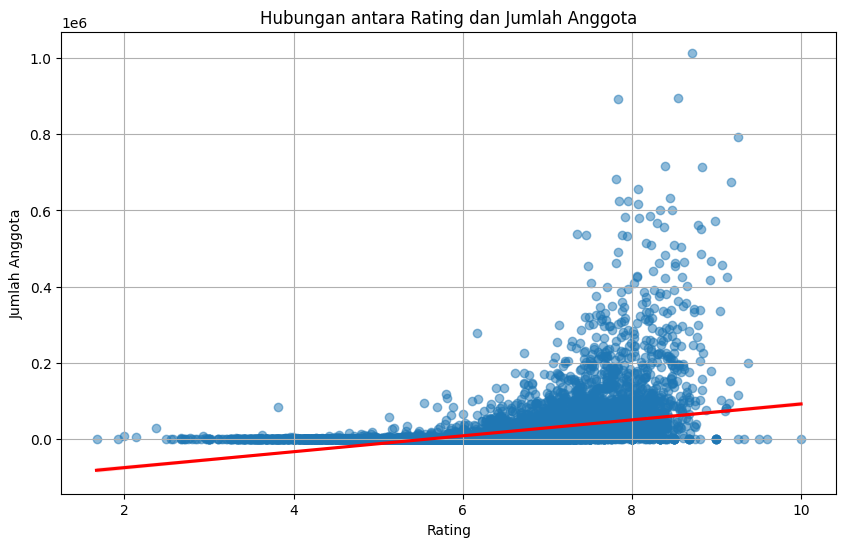

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='rating', y='members', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan antara Rating dan Jumlah Anggota')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anggota')
plt.grid(True)
plt.show()


###Scatter plot untuk melihat hubungan antara rating dan jumlah anggota

####**Interpretasi**


* Rating dan jumlah anggota saling terkait. Anime dengan rating tinggi cenderung memiliki lebih banyak anggota, dan komunitas anime dengan banyak anggota cenderung memiliki rating tinggi.
* Rating dapat menjadi indikator popularitas dan kualitas anime, dan komunitas anime yang aktif dan memiliki banyak konten menarik dapat menarik lebih banyak anggota.
* Anime dengan rating tinggi lebih populer dan menarik minat lebih banyak orang untuk bergabung dengan komunitasnya.
* Rating tinggi dapat menjadi indikator kualitas anime, sehingga orang lebih tertarik untuk menonton dan bergabung dengan komunitasnya.
* Komunitas anime dengan rating tinggi biasanya lebih aktif dan memiliki lebih banyak konten menarik, sehingga menarik lebih banyak anggota.





###Komposisi Variabel

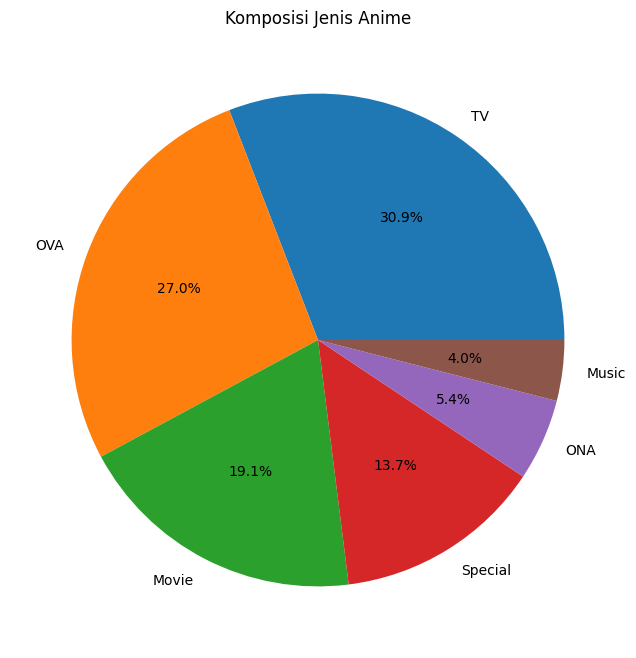

In [ ]:
plt.figure(figsize=(8, 8))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Komposisi Jenis Anime')
plt.ylabel('')
plt.show()

###Pie chart untuk melihat komposisi jenis anime

####**Interpretasi**



*   TV: 30.9%
*   OVA: 27.0%
* Movie:
* ONA: 13.7%
* Music: 4.0%
* Special: 5.4%
* Terdapat berbagai jenis anime yang tersedia, dengan anime TV sebagai format yang paling populer.
* Setiap jenis anime memiliki karakteristik dan target penontonnya sendiri.
* Penonton anime dapat memilih jenis anime yang sesuai dengan selera mereka.





###Perbandingan Antar Kategori yang Berbeda

<ipython-input-213-3c7397900dd0>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




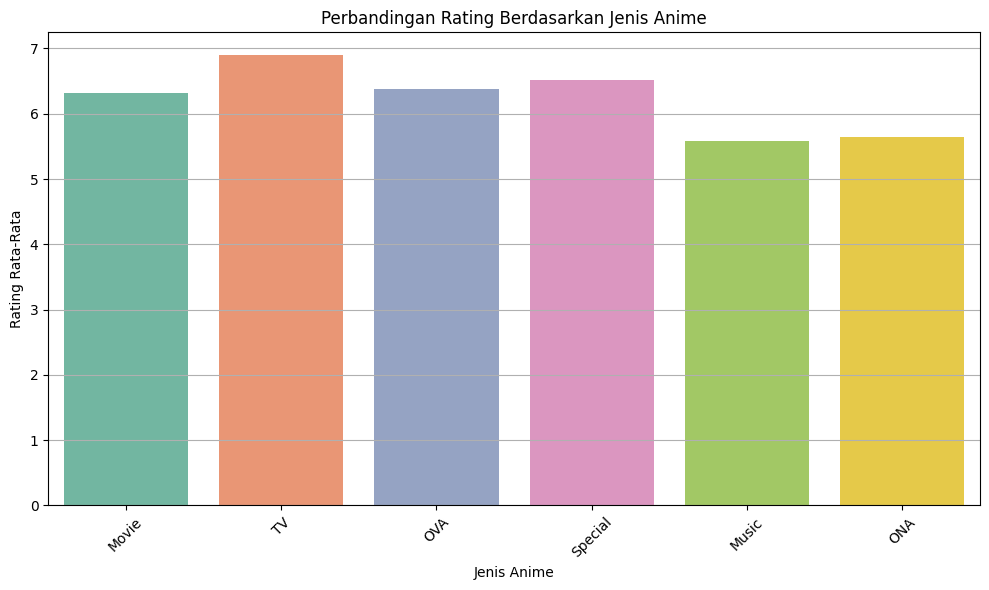

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='rating', data=data, hue='type', palette='Set2', ci=None, dodge=False)
plt.title('Perbandingan Rating Berdasarkan Jenis Anime')
plt.xlabel('Jenis Anime')
plt.ylabel('Rating Rata-Rata')
plt.xticks(rotation=45)
plt.legend([], frameon=False)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###Barchart untuk melihat perbandingan rating berdasarkan jenis anime

####**Interpretasi**


*   TV memiliki rating rata-rata tertinggi yaitu (6.8)
*   Movie dan OVA meiliki rata-rata yang sama yaitu (6.4)
* Music dan ONA memiliki rata-rata yang sama yaitu (5.6)





##**Verify Data Quality**

###Missing Values

In [ ]:
for col in data.columns:
  print(f"Kolom {col}: {data[col].isnull().sum()} nilai kosong")

Kolom anime_id: 0 nilai kosong
Kolom name: 0 nilai kosong
Kolom genre: 62 nilai kosong
Kolom type: 25 nilai kosong
Kolom episodes: 0 nilai kosong
Kolom rating: 230 nilai kosong
Kolom members: 0 nilai kosong


* pada output dataset diatas memiliki beberapa kolom yang nilai nya kosong, diantaranya genre sebanyak 65, type sebanyak 25, dan rating sebanyak 230
*Rating merupakan kolom terbanyak yang nilainya kosong

###Outliers Values

In [ ]:
data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce')

cols = ['anime_id', 'rating', 'members']

outliers_percentage = []

for col in cols:
    if pd.api.types.is_numeric_dtype(data[col]):
        q1, q3 = data[col].quantile(0.25), data[col].quantile(0.75)
        iqr = q3 - q1
        outlier_percentage = ((data[col] < (q1 - 1.5 * iqr)) | (data[col] > (q3 + 1.5 * iqr))).mean() * 100
        outliers_percentage.append(outlier_percentage)
    else:
        outliers_percentage.append('N/A')
results_df = pd.DataFrame({
    'Columns': cols,
    'Outliers Percentage': outliers_percentage
}).set_index('Columns')

print(results_df)


          Outliers Percentage
Columns                      
anime_id             0.000000
rating               1.862697
members             15.454693


outliers pada kolom anime_id, rating dan members



*   anime_id: Tidak ada outlier dalam kolom ini, yang berarti tidak ada nilai di luar rentang yang dianggap abnormal atau tidak wajar.
*   rating: Terdapat 1.86% outlier dalam kolom rating. Ini mengindikasikan bahwa sebagian kecil nilai dalam kolom rating berada di luar jangkauan nilai yang umum.
* members: Sekitar 15.45% data dalam kolom members dianggap outlier. Ini menunjukkan bahwa sejumlah besar entri memiliki jumlah anggota yang signifikan,



###Duplicated Values

In [ ]:
for col in data.columns:
    duplicated_values = data[col][data[col].duplicated()]
    if duplicated_values.empty:
        print(f'Tidak ada nilai duplikat dalam kolom {col}')
    else:
        print(f'Nilai duplikat dalam kolom {col}:')
        print(duplicated_values)

Tidak ada nilai duplikat dalam kolom anime_id
Nilai duplikat dalam kolom name:
10141           Saru Kani Gassen
10194    Shi Wan Ge Leng Xiaohua
Name: name, dtype: object
Nilai duplikat dalam kolom genre:
4        Action, Comedy, Historical, Parody, Samurai, S...
8        Action, Comedy, Historical, Parody, Samurai, S...
9        Action, Comedy, Historical, Parody, Samurai, S...
12       Action, Comedy, Historical, Parody, Samurai, S...
14                  Comedy, Drama, School, Shounen, Sports
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 9029, dtype: object
Nilai duplikat dalam kolom type:
2           TV
3           TV
4           TV
5           TV
6           

###**Duplikasi antar kolom**
pada output diatas mengecek perkolom apakah terdapat kolom yang memiliki duplikasi. kolom yang memiliki duplikasi diantara nya "name, genre, type, episode, rating, members" hanya ada satu kolom yang tidak memili duplikat yaitu kolom "anime_id"

In [ ]:
total_duplicates = f"Jumlah total duplikasi: {data.duplicated().sum()}"
total_duplicates

'Jumlah total duplikasi: 0'

###**Duplikasi keseluruhan DataFrame**

pada ouput diatas mengecek keseluruh dataframe apakah memiliki nilai duplikasi dan hasilnya tidak ada nilai duplikasi.

###Inconsistent Values / Noise

In [ ]:
print("Tipe data kolom:")
print(data.dtypes)

Tipe data kolom:
anime_id      int64
name         object
genre        object
type         object
episodes    float64
rating      float64
members       int64
dtype: object


In [ ]:
[print(f"Columns -> {col}\n{data[col].unique()}\n\n{'-' * 30}") for col in data.columns]

Columns -> anime_id
[32281  5114 28977 ...  5621  6133 26081]

------------------------------
Columns -> name
['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']

------------------------------
Columns -> genre
['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']

------------------------------
Columns -> type
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]

------------------------------
Columns -> episodes
[1.000e+00 6.400e+01 5.100e+01 2.400e+01 1.000e+01 1.480e+02 1.100e+02
 1.300e+01 2.010e+02 2.500e+01 2.200e+01 7.500e+01 4.000e+00 2.600e+01
 1.200e+01 2.700e+01 4.300e+01 7.400e+01 3.700e+01 2.000e+00 1.100e+01
 9.900e+01       nan 3.900e+01 1.010e+02 

[None, None, None, None, None, None, None]

Nilai unik pada kolom



*    anime_id: Berisi ID unik untuk setiap anime dalam dataset.
*   name: Berisi nama-nama anime yang berbeda dalam dataset.
* genre: Berisi genre-genre anime yang ada. Beberapa anime dapat memiliki beberapa genre yang dipisahkan oleh koma.
* type: Menunjukkan jenis anime, seperti Movie, TV series, OVA, Special, Music, atau ONA. Terdapat juga nilai "nan"
* episodes: Menunjukkan jumlah episode untuk setiap anime. Terdapat juga nilai 'Unknown'.
* rating: Menunjukkan rating untuk setiap anime. Rating berkisar dari 1 hingga 10.
*  members: Menunjukkan jumlah anggota yang memasukkan anime ke dalam daftar mereka.





#**Data Prepation**


##**Data Cleaning**

###**Handling Missing Values**

####**Pengecekan Missing Values**

In [ ]:
print((data.isna().sum() / len(data)) * 100)

anime_id    0.000000
name        0.000000
genre       0.504311
type        0.203351
episodes    2.765577
rating      1.870831
members     0.000000
dtype: float64


Pada output dataset ini beberapa kolom memiliki missing values diantara nya:



*   Genre dengan presntase 0.504311
*   Type dengan presentase 0.203351
* Rating dengan presentase 1.870831

Dikarenakan di antara 3 kolom ini tidak ada missing values yang memiliki presentase nya di atas 70% maka tidak ada kolom yang akan di hapus, tetapi ketiga kolom ini akan di imputasi



In [ ]:
data[data['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1.0,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12.0,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1.0,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1.0,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1.0,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,NaN,NaN,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1.0,NaN,51
11097,34474,Tsukipro The Animation,NaN,TV,NaN,NaN,843
11112,33035,Yuyushiki Special,NaN,Special,1.0,NaN,2294


In [ ]:
data[data['type'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,NaN,NaN,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,NaN,NaN,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,NaN,NaN,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,NaN,NaN,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,NaN,NaN,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,NaN,NaN,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,NaN,NaN,4017
10983,34332,Flying Babies,NaN,NaN,NaN,NaN,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,NaN,NaN,1045
10990,34485,Ganko-chan,NaN,NaN,NaN,NaN,11


In [ ]:
data[data['rating'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10.0,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,NaN,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,NaN,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,NaN,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,NaN,NaN,60999
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,NaN,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1.0,NaN,79
12280,34312,Saimin Class,Hentai,OVA,NaN,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,NaN,NaN,195


###**Imputasi Missing Values**

####**Imputasi Genre**

In [ ]:
data['genre'].dropna().describe()

count      12232
unique      3264
top       Hentai
freq         823
Name: genre, dtype: object

Dikarenakan kolom genre ini termasuk kolom kategorikal yang dimana tidak bisa mencari mean, median,dan kuartil maka dari itu kita akan imputasi genre ini menggunakan nilai modus atau nilai tertinggi yang paling banyak di gunakan yaitu "Hentai"

In [ ]:
data['genre'] = data['genre'].fillna(data['genre'].mode()[0])

####**Imputasi Type**

In [ ]:
data['type'].dropna().describe()

count     12269
unique        6
top          TV
freq       3787
Name: type, dtype: object

Kolom type juga merukan kolom kategorikal jadi kita akan menggunakan nilai modus atau nilai tertinggi yang paling banyak yaitu "TV"

In [ ]:
data['type'] = data['type'].fillna(data['type'].mode()[0])

####**Imputasi Rating**

In [ ]:
data['rating'].dropna().describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

Dikarenakan kolom rating ini tidak termasuk kategorikal yang dimana kolom rating ini dapat dihitung mean nya maka kita akan imputasi missing values pada kolom rating ini dengan nilai mean yaitu "6.473902"

In [ ]:
data['rating'] = data['rating'].fillna(data['rating'].dropna().mean())

####**Pengecekan Ulang Missing Values**

In [ ]:
print((data.isna().sum() / len(data)) * 100)

anime_id    0.000000
name        0.000000
genre       0.000000
type        0.000000
episodes    2.765577
rating      0.000000
members     0.000000
dtype: float64


###**Handiling Duplicated Values**

In [ ]:
total_duplicates = f"total duplikasi: {data.duplicated().sum()}"
total_duplicates


'total duplikasi: 0'

Pada dataset ini Dapat dilihat dari aoutput diatas, bahwa dataset ini tidak memiliki nilai yang duplikat

###**Handling Outlers**

####**Pengecekan Outliers**

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)


IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR


outliers = (data < lower_bound) | (data > upper_bound)


print("Kolom dengan outliers:")
print(outliers.any())

Kolom dengan outliers:
anime_id    False
episodes     True
genre       False
members      True
name        False
rating       True
type        False
dtype: bool


<ipython-input-232-b2053ef76dd3>:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-232-b2053ef76dd3>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-232-b2053ef76dd3>:12: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



Pada output dataset di atas kolom yang memiliki outliers adalah kolom members dan rating dan mari kita lihat berapa presentase dari masing-masing kolom members dan rating ini

In [ ]:
results = []

cols = data.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(data))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
anime_id,0.000000
episodes,9.134537
rating,2.033512
members,15.454693


pada kolom rating terdapat 2.033512 outliers sedangkan members terdapat 15.454693 outliers, mari kita visualisasikan outliers tersebut




Dikarenakan members diatas 10% maka kolom members ini akan kita imputasi dan untuk kolom rating ini akan menggunakan metode Truncation yang dimana akan menghapus nilai yang dianggap outliers lalu memberikan batasan nilai-nilai nya dalam rentan terntentu

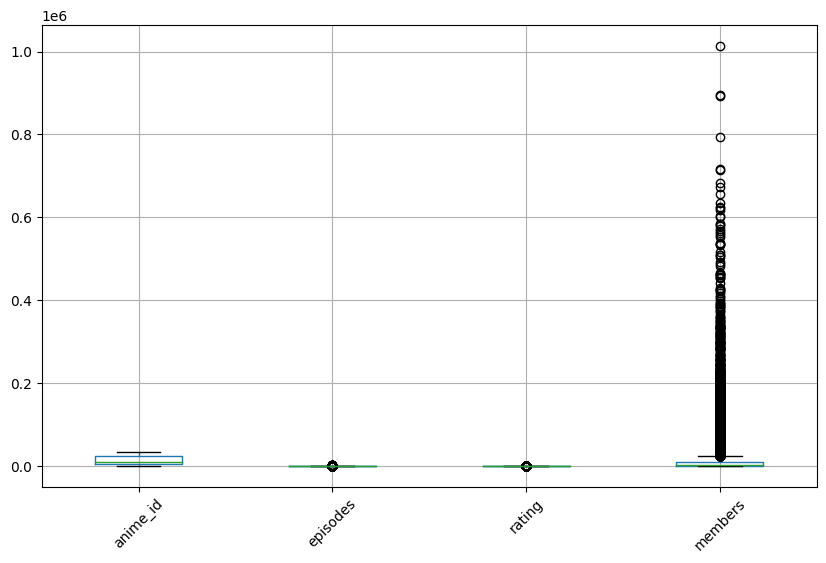

In [ ]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xticks(rotation=45)
plt.title
plt.show()

####**Truncation Rating**

In [ ]:
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['rating'] >= lower_bound) & (data['rating'] <= upper_bound)]

melakukan penghapusan baris pada kolom rating untuk menangani outliers

In [ ]:
data['rating'] = data['rating'].clip(0, 10)

<ipython-input-236-35905c58b831>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Memerikan batasan untuk Rating yang dimana rentang nya 0-10

###**Imputasi Members**

In [ ]:
median_members = data['members'].median()

upper_bound_members = data['members'].quantile(0.95)

data.loc[data['members'] > upper_bound_members, 'members'] = median_members

Kolom members di imputasi dikarenakan presentase dari otliers nya melebihi 10% maka dari itu kita akan menggunakan median dari dataset tersebut

####**Pengecekan Ulang**

In [ ]:
results = []

cols = data.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(data))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
anime_id,0.000000
episodes,9.274327
rating,0.523082
members,14.870475


dikarenakan kolom members masih memiliki outlies yang cukup banyak maka dari itu kita ubah metode imputasi nya yang dimana sebelumnya kita menggunakan median maka kita akan gunakan modus

In [ ]:
mode_members = data['members'].mode()[0]

upper_bound_members = data['members'].quantile(0.95)

data.loc[data['members'] > upper_bound_members, 'members'] = mode_members

**Pengecekan kembali**

In [ ]:
results = []

cols = data.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(data))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
anime_id,0.000000
episodes,9.274327
rating,0.523082
members,14.455330


###**Handling Inconsistent Values**

In [ ]:
for column in data.columns:
    print(f"Kolom {column} memiliki jenis data: {data[column].dtype}")


Kolom anime_id memiliki jenis data: int64
Kolom name memiliki jenis data: object
Kolom genre memiliki jenis data: object
Kolom type memiliki jenis data: object
Kolom episodes memiliki jenis data: float64
Kolom rating memiliki jenis data: float64
Kolom members memiliki jenis data: int64


In [ ]:
[print(f"Columns -> {col}\n{data[col].unique()}\n\n{'-' * 30}") for col in data.columns]

Columns -> anime_id
[ 4181 28851   918 ...  5621  6133 26081]

------------------------------
Columns -> name
['Clannad: After Story' 'Koe no Katachi' 'Gintama' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']

------------------------------
Columns -> genre
['Drama, Fantasy, Romance, Slice of Life, Supernatural'
 'Drama, School, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Action, Comedy, Hentai, Romance, Supernatural' 'Hentai, Sports'
 'Drama, Romance, School, Yuri']

------------------------------
Columns -> type
['TV' 'Movie' 'OVA' 'Special' 'Music' 'ONA']

------------------------------
Columns -> episodes
[2.400e+01 1.000e+00 2.010e+02 2.500e+01 2.200e+01 1.000e+01 7.500e+01
 4.000e+00 2.600e+01 1.200e+01 2.700e+01 4.300e+01 1.300e+01 7.400e+01
 3.700e+01 2.000e+00 1.100e+01 9.900e+01       nan 3.900e+01 1.010e+02
 4.700e+01 5.000e+01 5.100e+01 6.200e+01 3.300e+01 1.1

[None, None, None, None, None, None, None]

* anime tidak perlu ada penanganan khusus dikarenakan kolom ini adalah identifikasi yang harus unik utuuk setiap anime

* name juga tidak perlu ada penanganan khusus dikarenakan beberapa judul anime memang memiliki beberapa simbol yang sedikit unik

* genre juga demikian tidak ada penanganan khusus dikarenakan dari ouput diatas tidak ada genre yang benar-benar unik atau tidak konsisten

* type juga demikian tidak ada penanganan khusus untuk kolom dataset ini

* episode, berbeda dengan episode ini, baris dalam episode ini terdapat kata "unknow" yang dimana ini merupakan inkonsisten data

* members tidak memiliki penanganan khusus dikarenakan output diatas tidak ada yang benar-bener unik

####**Penanganan Inconsistent Values pada kolom Episode**

penanganan unknow menggunakan modus

In [ ]:
mode_episodes = data['episodes'].mode()[0]
data.loc[data['episodes'] == 'Unknown', 'episodes'] = mode_episodes

Mengecek kembali inconsistent values pada kolom episode

In [ ]:
unique_episodes = data['episodes'].unique()
print("Nilai unik dalam kolom 'episodes':")
print(unique_episodes)

Nilai unik dalam kolom 'episodes':
[2.400e+01 1.000e+00 2.010e+02 2.500e+01 2.200e+01 1.000e+01 7.500e+01
 4.000e+00 2.600e+01 1.200e+01 2.700e+01 4.300e+01 1.300e+01 7.400e+01
 3.700e+01 2.000e+00 1.100e+01 9.900e+01       nan 3.900e+01 1.010e+02
 4.700e+01 5.000e+01 5.100e+01 6.200e+01 3.300e+01 1.120e+02 2.300e+01
 3.000e+00 9.400e+01 6.000e+00 8.000e+00 1.400e+01 7.000e+00 4.000e+01
 1.500e+01 2.030e+02 7.700e+01 2.910e+02 1.200e+02 1.020e+02 9.600e+01
 3.800e+01 7.900e+01 1.750e+02 1.030e+02 7.000e+01 1.530e+02 4.500e+01
 5.000e+00 2.100e+01 6.300e+01 5.200e+01 2.800e+01 1.450e+02 3.600e+01
 6.900e+01 6.000e+01 1.780e+02 1.140e+02 3.500e+01 6.100e+01 3.400e+01
 1.090e+02 2.000e+01 9.000e+00 1.480e+02 4.900e+01 3.660e+02 9.700e+01
 4.800e+01 7.800e+01 3.580e+02 1.550e+02 1.040e+02 1.130e+02 5.400e+01
 1.670e+02 1.610e+02 4.200e+01 1.420e+02 3.100e+01 6.400e+01 3.730e+02
 2.200e+02 4.600e+01 1.950e+02 1.700e+01 1.787e+03 7.300e+01 1.470e+02
 1.270e+02 1.600e+01 1.900e+01 9.800e+01 1

dapat dilihat tidak ada lagi valuees inconsisten(unknow) pada output nya

##**Construct Data**

###**Feature Engineering**

In [ ]:
def age_range(genre):
    if genre == {"hentai", "gore"}:
        return "18+"
    else:
        return "10+"
data["RangeAge"] = data['genre'].apply(age_range)


###**Pengecekan Hasil**

In [ ]:
data.head()

,anime_id,name,genre,type,episodes,rating,members,RangeAge
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24.0,9.06,1631,10+
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1.0,9.05,1631,10+
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201.0,9.04,1631,10+
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25.0,8.98,1631,10+
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25.0,8.93,1631,10+


Pada dataset ini saya menambahkan kolom baru yaitu "RangeAge" yang dimana kolom ini merupakan fitur untuk memberitau bahwa anime tersebut cocok untuk di tonton mulai dari umur yang tertera

##**Data Reduction**

###**Pengurangan Fitur yang Kurang Relevan**

In [ ]:
data_corr = data.corr(numeric_only=True)
px.imshow(data_corr)

####**Penghapusan Members**

faktor Penghapusan members

Preferensi pengguna anime dapat bervariasi secara signifikan dan tidak selalu bergantung pada popularitas anime di antara komunitas. Pengguna dapat memiliki preferensi yang unik dan tidak selalu mengikuti tren atau popularitas. lebih tepat nya banyak tidak nya members dalam komunitas tidak begitu berpengaruh dalam pemberian rekomendasi kepada pengguna karena bisa saja pengguna menyukai genre ataupun anime yang tidak banyak disuka orang-orang pada umumnya

In [ ]:
data = data.drop(["members"], axis=1)

###**Pengecekan Hasil**

In [ ]:
data.head()

,anime_id,name,genre,type,episodes,rating,RangeAge
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24.0,9.06,10+
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1.0,9.05,10+
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201.0,9.04,10+
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25.0,8.98,10+
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25.0,8.93,10+


##**Data Transformation**

In [ ]:
data

,anime_id,name,genre,type,episodes,rating,RangeAge
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24.0,9.06,10+
11,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1.0,9.05,10+
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,201.0,9.04,10+
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25.0,8.98,10+
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",TV,25.0,8.93,10+
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1.0,4.15,10+
12290,5543,Under World,Hentai,OVA,1.0,4.28,10+
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4.0,4.88,10+
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1.0,4.98,10+


###**Mapping**

In [ ]:
data['type'] = data['type'].map({'MOVIE':0, 'TV':1, 'OVA':2, 'SPECIAL':3, 'ONA':4, 'MUSIC':6})

In [ ]:
data

,anime_id,name,genre,type,episodes,rating,RangeAge
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",1.0,24.0,9.06,10+
11,28851,Koe no Katachi,"Drama, School, Shounen",NaN,1.0,9.05,10+
12,918,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",1.0,201.0,9.04,10+
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",1.0,25.0,8.98,10+
14,28891,Haikyuu!! Second Season,"Comedy, Drama, School, Shounen, Sports",1.0,25.0,8.93,10+
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,2.0,1.0,4.15,10+
12290,5543,Under World,Hentai,2.0,1.0,4.28,10+
12291,5621,Violence Gekiga David no Hoshi,Hentai,2.0,4.0,4.88,10+
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,2.0,1.0,4.98,10+


pada output diatas ada output dari kolom type yang berisikan "NaN" yang dimana kolom tersebut berarti memiliki nilai lain selain yang kita mapping sebelum nya, pada konteks dataset kali ini dalam satu kolom nilai type ini memiliki lebih dari satu nilai maka dari itu kolom nya berubah menjadi "NaN"

###**Encoding**

In [ ]:
data = pd.get_dummies(data)

data yang telah kita prepation telah tersimpan di variabel dan data ini dapat kita unduh

In [ ]:
pd.read_csv("anime.csv")

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
data.to_csv("Data Cleaned.csv", index=False)

#**Data Clanned Link**

https://drive.google.com/file/d/170X-HNaEpOUBPlAFQJnsW5OU4pFVzMz8/view?usp=sharing

#**Modeling**

##**Select Modeing Techniques**

select modeling techniques adalah proses pemilihan metode atau teknik pemodelan yang paling sesuai untuk menyeselsikan masalah tertentu dalam analisis data, pada dataset kali ini akan mencoba menggunakan metode pemodelan predict dan association

##**Modeling Predict**

####**Pre-Processing**

In [ ]:
data2.head()

,anime_id,type,episodes,rating,name_&quot;0&quot;,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,...,"genre_Slice of Life, Space","genre_Slice of Life, Supernatural",genre_Space,genre_Sports,"genre_Super Power, Supernatural, Vampire",genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,RangeAge_10+
0,4181,1.0,24.0,9.06,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,28851,NaN,1.0,9.05,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,918,1.0,201.0,9.04,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2904,1.0,25.0,8.98,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,28891,1.0,25.0,8.93,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


####**Split Data**

In [ ]:
x = data2.drop('anime_id', axis=1)
y =data2['anime_id']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

split data adalah proses memisahkan dataset menjadi dua bagian yang terpisah: data latih dan data uji. pada codingan di atas membuat variabel x yang berisi fitur dari dataset tetapi menghapus anime_id, variabel x juga menjadi variabel independen yang digunakan melatih model, sedangkan variabel y yang berisi kolom anime_id variabel yang menjadi dependen atau target yang akan di prediksi oleh model

####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)


Normalisasi data adalah proses mengubah nilai-nilai dalam dataset sehingga mereka memiliki skala yang seragam atau terstandarisasi. Tujuan normalisasi adalah untuk mengubah distribusi nilai-nilai dalam dataset sehingga rentangnya menjadi seragam atau memiliki distribusi yang diinginkan

####**Build Model**

####**Gaussian Naive Bayes**

In [ ]:
imputer = SimpleImputer(strategy='mean')


imputer.fit(x_train)


x_train_imputed = imputer.transform(x_train)
x_test_imputed = imputer.transform(x_test)

gnb = GaussianNB()
gnb.fit(x_train_imputed, y_train)



GaussianNB()

Codingan di atas melakukan pengisian nilai yang hilang dalam dataset menggunakan SimpleImputer dengan menggunakan rata-rata. Setelah nilai yang hilang diimputasi, model Gaussian Naive Bayes dilatih menggunakan data latih yang telah diimputasi, dan kemudian digunakan untuk membuat prediksi. gaussian naive bayes merupakan salah  satu algoritma pemecah masalah yang termaksuk kedalam metode klasifikasi, algoritma ini menggunakan teori kemungkinan

####**K-Nearest Neighbor**

In [ ]:
imputer = SimpleImputer(strategy='mean')


imputer.fit(x_train_norm)


x_train_imputed = imputer.transform(x_train_norm)


knn = KNeighborsClassifier()
knn.fit(x_train_imputed, y_train)

KNeighborsClassifier()

Codingan di atas melakukan pengisian nilai yang hilang dalam dataset menggunakan SimpleImputer dengan menggunakan rata-rata. Setelah nilai yang hilang diimputasi, K-Nearest Neighbors (KNN) adalah algoritma pembelajaran mesin yang non-parametrik dan berbasis instansi. Ini digunakan untuk masalah klasifikasi dan regresi. Ide dasar di balik KNN adalah untuk menghitung jarak antara titik data.

####**Decision Tree**

In [ ]:
imputer = SimpleImputer(strategy='mean')


imputer.fit(x_train_norm)


x_train_imputed = imputer.transform(x_train_norm)

dtc = DecisionTreeClassifier()

dtc.fit(x_train_imputed, y_train)

DecisionTreeClassifier()

Codingan di atas melakukan pengisian nilai yang hilang dalam dataset menggunakan SimpleImputer dengan menggunakan rata-rata. Setelah nilai yang hilang diimputasi, decision tree merupakan algortma model prediksi target algoritma ini menggunakan terknik membagi dan menaklikkan untuk membagi ruang pencarian masalah

###**Begins and compare Predict**

In [ ]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [ ]:
combined_data.head()

,type,episodes,rating,name_&quot;0&quot;,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,name_&quot;Eiyuu&quot; Kaitai,...,"genre_Super Power, Supernatural, Vampire",genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,RangeAge_10+,anime_id,gnb_prediction,knn_prediction,dtc_prediction
0,1.0,25.0,8.64,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,31240,9260,523,2251
1,1.0,11.0,8.62,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,9989,9260,523,30276
2,1.0,25.0,8.93,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,28891,9260,523,20583
3,NaN,1.0,8.59,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,7472,9260,523,28805
4,1.0,12.0,8.73,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,11741,9260,523,30276


Codingan di atas bertujuan untuk menggabungkan data uji (x_test dan y_test) dengan hasil prediksi dari tiga model yang berbeda (GNB, KNN, dan DTC) menjadi satu dataframe.

##**Modeling association**

####**Pre Prosesing**

In [ ]:
x_final = data2.drop("anime_id", axis=1)

variabel x_final menyimpan data cleaned yang dimana kolom anime_id dihapus

#####**Normalisasi Data**

In [ ]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

Dalam konteks normalisasi data, normalisasi bertujuan untuk mengubah nilai-nilai dalam setiap fitur sehingga distribusi nilai-nilai tersebut menjadi seragam dan dapat diinterpretasikan dengan lebih baik oleh algoritma pembelajaran mesin. Ini membantu menghindari masalah seperti perbedaan skala antar fitur, yang dapat memengaruhi kinerja algoritma pembelajaran mesin seperti regresi, clustering, atau klasifikasi.

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

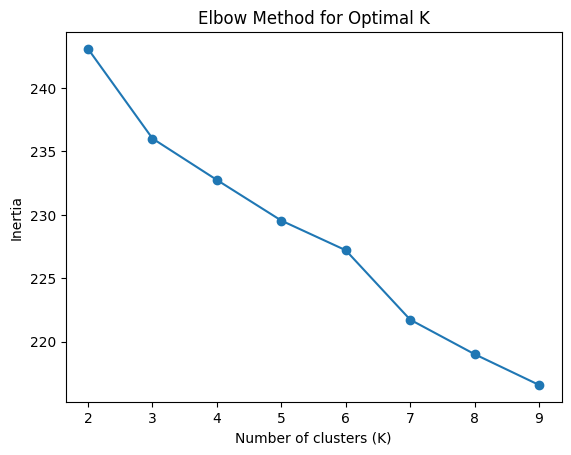

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_final_imputed = imputer.fit_transform(x_final_norm)


inertia_values = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_imputed)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Output dari dataset pada gambar menunjukkan bahwa nilai k optimal untuk dataset ini adalah 4. Ini berarti data dapat dikelompokkan secara optimal menjadi 4 cluster.

###**Build Model**

####**K-Means**

In [ ]:
imputer = SimpleImputer(strategy='mean')
x_final_imputed = imputer.fit_transform(x_final_norm)


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

k-means adalah algortiman analisis klaster yang merupakan salah satu alat untuk mengelompokkan data berdasarkan variabel. pada code di atas sebelumnya nilai nan di imputasi terlebih dahulu menggunkan mean

####**Hierarchical Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

code diatas digunakan untuk menginisialisasi objek clustering menggunakan algoritma hierarchical clustering (pengelompokan hirarkis).

###**Begins and Compare Clusters**

In [ ]:
imputer = SimpleImputer(strategy='mean')
x_final_imputed = imputer.fit_transform(x_final_norm)

kmeans_clust = kmeans.predict(x_final_imputed)
hierarchy_clust = hc.fit_predict(x_final_imputed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

In [ ]:
combined_data_assoc.head()

,type,episodes,rating,name_&quot;0&quot;,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,name_&quot;Eiyuu&quot; Kaitai,...,genre_Space,genre_Sports,"genre_Super Power, Supernatural, Vampire",genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,RangeAge_10+,kmeans_cluster,hierarchy_cluster
0,1.0,24.0,9.06,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
1,NaN,1.0,9.05,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
2,1.0,201.0,9.04,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1
3,1.0,25.0,8.98,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1
4,1.0,25.0,8.93,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1


pertama mengisi nilai yang hilang dalam dataset menggunakan SimpleImputer dengan 'mean'. Setelah itu, kita melakukan clustering menggunakan KMeans dan Hierarchical Clustering untuk mengelompokkan data ke dalam cluster. Hasil clustering dari kedua metode tersebut dimasukkan ke dalam DataFrame baru yang disertakan dengan data asli. Akhirnya, lima baris pertama dari DataFrame yang telah digabungkan ditampilkan untuk memeriksa hasil penggabungan data. Dengan langkah-langkah ini, kita mempersiapkan data untuk analisis clustering, melakukan clustering dengan dua metode yang berbeda, dan memeriksa hasil clustering dalam satu tampilan yang lengkap.

##**Tensorflow Classification**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train_norm, y_train, epochs=10, batch_size=32, validation_data=(x_test_norm, y_test))

Epoch 1/10
3/3 [==============================] - 3s 439ms/step - loss: nan - accuracy: 0.0104 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 118ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 0s 99ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 0s 88ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 52ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 40ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/10
3/3 

In [ ]:
tf_pred_prob = model.predict(x_test_norm)

tf_pred = np.argmax(tf_pred_prob, axis=1)

tf_col = pd.DataFrame(tf_pred, columns=["tf_prediction"])

final_data = pd.concat([combined_data, tf_col], axis=1)

1/1 [==============================] - 0s 115ms/step


In [ ]:
final_data

,type,episodes,rating,name_&quot;0&quot;,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,name_&quot;Eiyuu&quot; Kaitai,...,genre_Supernatural,genre_Thriller,genre_Vampire,genre_Yaoi,RangeAge_10+,anime_id,gnb_prediction,knn_prediction,dtc_prediction,tf_prediction
0,1.0,25.0,8.64,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,31240,9260,523,2251,0
1,1.0,11.0,8.62,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,9989,9260,523,30276,0
2,1.0,25.0,8.93,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,28891,9260,523,20583,0
3,NaN,1.0,8.59,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,7472,9260,523,28805,0
4,1.0,12.0,8.73,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,11741,9260,523,30276,0
5,1.0,NaN,8.58,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,21,9260,523,2251,0
6,1.0,47.0,8.55,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,877,9260,523,1535,0
7,1.0,75.0,8.83,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,263,9260,523,19647,0
8,1.0,11.0,8.65,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,7785,9260,523,30276,0
9,NaN,1.0,8.47,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,572,9260,523,5205,0


code-code diatas digunakan untuk melakukan prediksi menggunakan model neural network yang telah dilatih sebelumnya pada data uji (x_test_norm). Hasil prediksi kemudian digabungkan dengan data asli (combined_data) dalam sebuah DataFrame (final_data)